In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from astropy import constants as const
from multiprocessing import Pool
import dynesty
import dill
import pickle
import corner

In [3]:
import pickle
with open(f'/mnt/pfs/akash.mishra/paper/data_files/final_mass_and_snr.pkl', 'rb') as file_mass:
    mf_snr = pickle.load(file_mass)

In [ ]:
# Final Mass - SNR Plot

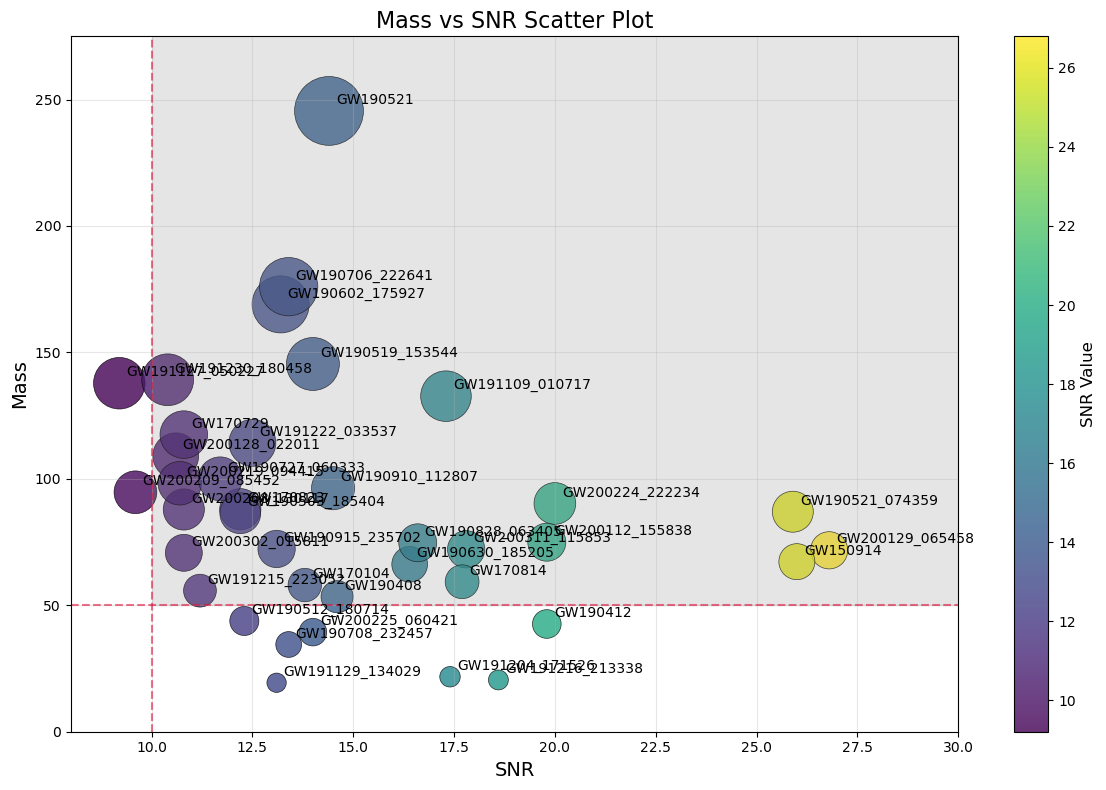

In [5]:
masses = [event['mf'] for event in mf_snr.values()]
snrs = [event['snr'] for event in mf_snr.values()]
sizes = [mass * 10 for mass in masses]  # Scale mass to represent point size
colors = ['red' if mass > 50 and snr > 14 else 'blue' for mass, snr in zip(masses, snrs)]
event_names = list(mf_snr.keys())


plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    snrs, masses, s=sizes, c=snrs, cmap="viridis", alpha=0.8, edgecolors='black', linewidth=0.5
)


for i, event in enumerate(event_names):
    plt.annotate(
        event, 
        (snrs[i], masses[i]), 
        textcoords="offset points", 
        xytext=(5, 5),  # Offset to prevent overlap with the point
        ha='left', fontsize=10
    )

# Region with mass > 50 and snr > 10
plt.axhline(y=50, color='crimson', linestyle='--', alpha=0.6)
plt.axvline(x=10, color='crimson', linestyle='--', alpha=0.6)
plt.fill_betweenx([50, 300], 10, 35, color='gray', alpha=0.2)


cbar = plt.colorbar(scatter)
cbar.set_label('SNR Value', fontsize=12)


plt.title('Mass vs SNR Scatter Plot', fontsize=16)
plt.xlabel('SNR', fontsize=14)
plt.ylabel('Mass', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.ylim([0.0, 275])
plt.xlim([8.0, 30])
plt.show()